In [6]:
#################################################Assignment6#############################################
# Question 1
# The columns of the output matrix are powers of the input vector. 
# The order of the powers is determined by the increasing boolean argument. 
# Specifically, when increasing is False, the i-th output column is the input vector raised element-wise 
# to the power of N - i - 1. 
# Such a matrix with a geometric progression in each row is named for Alexandre- Theophile Vandermonde.

import numpy as np

def myvander(x, N=None, increasing=False):
    if increasing==False:
        return (np.column_stack([x**(N-i-1) for i in range(N)]))
    else:
        return (np.column_stack([x**(i) for i in range(0,N)]))

x=np.array([1,2,3,5])
N=3
print("Decreasing")
print(myvander(x,N,False))
print("="*20)
print("Increasing")
print(myvander(x,N,True))

Decreasing
[[ 1  1  1]
 [ 4  2  1]
 [ 9  3  1]
 [25  5  1]]
Increasing
[[ 1  1  1]
 [ 1  2  4]
 [ 1  3  9]
 [ 1  5 25]]


In [4]:
# Question 2
# Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average of
# the given sequence is defined as follows:
# The moving average sequence has n-k+1 elements as shown below.
# The moving averages with k=4 of a ten-value sequence (n=10) is shown below
# i 1 2 3 4 5 6 7 8 9 10
# ===== == == == == == == == == == ==
# Input 10 20 30 40 50 60 70 80 90 100
# y1 25 = (10+20+30+40)/4
# y2 35 = (20+30+40+50)/4
# y3 45 = (30+40+50+60)/4
# y4 55 = (40+50+60+70)/4
# y5 65 = (50+60+70+80)/4
# y6 75 = (60+70+80+90)/4
# y7 85 = (70+80+90+100)/4
# Thus, the moving average sequence has n-k+1=10-4+1=7 values.
# Problem Statement:
# Write a function to find moving average in an array over a window:
# Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

import numpy as np
import pandas as pd
k=4

data = {'score': [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]}

# Create dataframe
df = pd.DataFrame(data)
df
# View dataframe

df["avg"]=df.rolling(window=k).mean()

df

,score,avg
0,3,NaN
1,5,NaN
2,7,NaN
3,2,4.25
4,8,5.50
5,10,6.75
6,11,7.75
7,65,23.50
8,72,39.50
9,81,57.25


In [7]:
#Assignment 7
# Question 1
# How-to-count-distance-to-the-previous-zero
# For each value, count the difference back to the previous zero (or the start of the Series,
# whichever is closer)
# create a new column 'Y'
# Consider a DataFrame df where there is an integer column 'X'
# import pandas as pd
# df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
# Expected Output - [1,2,0,1,2,3,4,0,1,2]

import numpy as np
import pandas as pd

matrix_data = np.array([7, 2, 0, 3, 4, 2, 5, 0, 3, 4])
row_labels = ['A','B','C','D','E','F','G','H','I','J']
column_headings = ['X']

df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
# df["new"]=df['s1']+1

x = (df['X'] != 0).cumsum()
y = x != x.shift()
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()

df

,X,Y
A,7,1.0
B,2,2.0
C,0,0.0
D,3,1.0
E,4,2.0
F,2,3.0
G,5,4.0
H,0,0.0
I,3,1.0
J,4,2.0


In [8]:
# Question 2
# Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.

import numpy as np
import pandas as pd

dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)
s


2015-01-01    0.977459
2015-01-02    0.283973
2015-01-05    0.731924
2015-01-06    0.500906
2015-01-07    0.187106
2015-01-08    0.173135
2015-01-09    0.745218
2015-01-12    0.961487
2015-01-13    0.912604
2015-01-14    0.015215
2015-01-15    0.373897
2015-01-16    0.591404
2015-01-19    0.163968
2015-01-20    0.966614
2015-01-21    0.775725
2015-01-22    0.641803
2015-01-23    0.848873
2015-01-26    0.527934
2015-01-27    0.033159
2015-01-28    0.668594
2015-01-29    0.840920
2015-01-30    0.141216
2015-02-02    0.631397
2015-02-03    0.178510
2015-02-04    0.555829
2015-02-05    0.357173
2015-02-06    0.845585
2015-02-09    0.174509
2015-02-10    0.666059
2015-02-11    0.804150
                ...   
2015-11-20    0.586472
2015-11-23    0.942366
2015-11-24    0.411310
2015-11-25    0.291296
2015-11-26    0.630976
2015-11-27    0.181305
2015-11-30    0.474505
2015-12-01    0.998247
2015-12-02    0.365767
2015-12-03    0.238288
2015-12-04    0.289181
2015-12-07    0.162838
2015-12-08 

In [9]:
# Question 3
# Find the sum of the values in s for every Wednesday

print("\nsum of the values for every Wednesday")
print(s[dti.weekday == 2].sum())
print(s[dti.weekday_name=="Wednesday"].sum())


sum of the values for every Wednesday
26.621241562360066
26.621241562360066


In [10]:
# Question 4
# Average For each calendar month

print("\nAverage For each calendar month")

# # Approach 1
# print(s.resample('M', how='mean'))
# print("-"*30)
# # Approach 2

print(s.resample('M').mean())


Average For each calendar month
2015-01-31    0.548324
2015-02-28    0.489988
2015-03-31    0.468781
2015-04-30    0.516310
2015-05-31    0.551881
2015-06-30    0.585319
2015-07-31    0.401105
2015-08-31    0.548846
2015-09-30    0.516449
2015-10-31    0.387428
2015-11-30    0.457155
2015-12-31    0.492585
Freq: M, dtype: float64


In [11]:
# Question 5
# For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

print("\nEach group of four consecutive calendar months in s, find the date on which the highest value occurred.")
# print(s.groupby(pd.TimeGrouper('4M')).idxmax())
print(s.groupby(pd.Grouper(freq='4M')).idxmax())


Each group of four consecutive calendar months in s, find the date on which the highest value occurred.
2015-01-31   2015-01-01
2015-05-31   2015-05-12
2015-09-30   2015-08-19
2016-01-31   2015-12-01
Freq: 4M, dtype: datetime64[ns]


In [2]:
#PS 2
# Question 1
# Read the dataset from the below link
# https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_
# Names/US_Baby_Names_right.csv
# Questions:
# 1. Delete unnamed columns
# 2. Show the distribution of male and female
# 3. Show the top 5 most preferred names
# 4. What is the median name occurence in the dataset
# 5. Distribution of male and female born count by states

import numpy as np
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
data.head(5)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [3]:
# 1. Delete unnamed columns

data.drop('Unnamed: 0',axis=1,inplace=True)
data.head(5)

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [4]:
#2. Show the distribution of male and female

data.groupby('Gender').count()

,Id,Name,Year,State,Count
Gender,,,,,
F,558846,558846,558846,558846,558846
M,457549,457549,457549,457549,457549


In [5]:
# 3. Show the top 5 most preferred names
pd.value_counts(data['Name'].values, sort=True).head(5)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
dtype: int64

In [6]:
# 4. What is the median name occurence in the dataset

# pd.value_counts(data['Name'].values, sort=True).median
print("Median = " +str(data.loc[:,"Id"].median())) # to print median

print("Median = " +str(data["Id"].median())) #  another interpretation of median


Median = 2811921.0
Median = 2811921.0


In [8]:
#5. Distribution of male and female born count by states

# # Using Pivot
# print(pd.pivot_table(data,index="Gender", columns="State", aggfunc="count"))

# Using crosstab
pd.crosstab(index=data.Gender,columns=data.State)

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Gender,,,,,,,,,,,,,,,,,,,,,
F,2404,9878,7171,14518,45144,11424,6575,3053,2549,25781,...,2838,13063,39760,9515,14759,1398,13329,10549,4305,1456
M,2587,8419,6475,10820,31637,9183,5733,3000,2440,20070,...,2908,10588,27791,8233,11997,1618,11049,8940,3733,1904


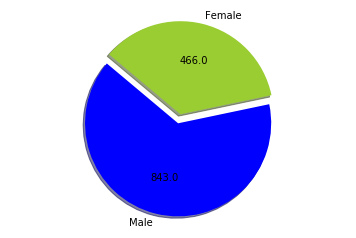

In [10]:
#Assignment9
# Question 1
# This assignment is for visualization using matplotlib:
# data to use:
# url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
# titanic = pd.read_csv(url)
# Charts to plot:
# 1. Create a pie chart presenting the male/female proportion



import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
data.head(5)

# data = pd.read_csv('titanic_original.csv')
# data.head(5)
explode = (0.1, 0)
labels = ['Male', 'Female']
colors = ['blue', 'yellowgreen']
sizes = data.sex.value_counts()

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

plt.pie(data.sex.value_counts(),shadow=True, explode=explode, labels=labels, colors=colors,
        autopct=absolute_value, startangle=140)

plt.title="Male / Female Proportion"
plt.axis('equal')
plt.show()


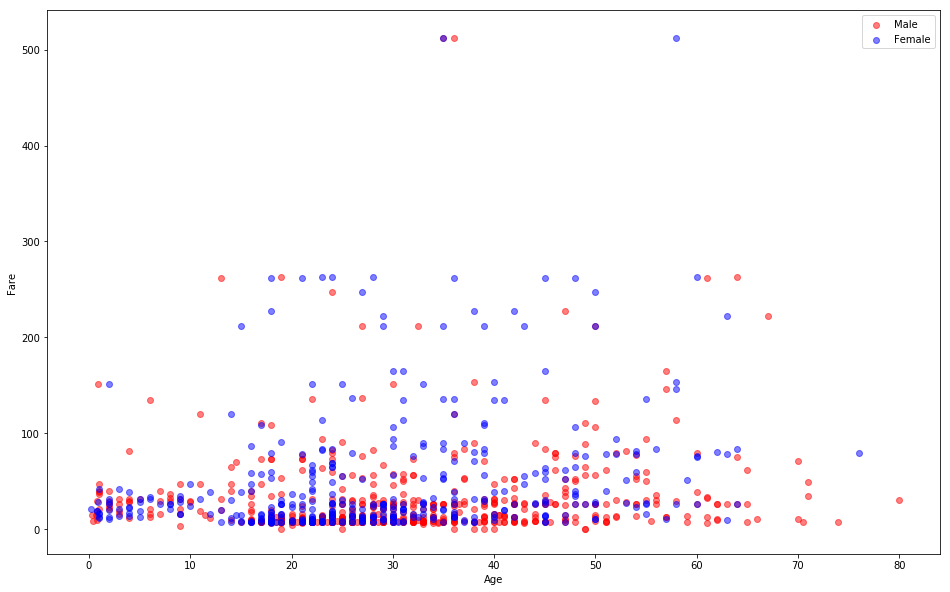

In [11]:
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

#Method 1
# colors = ['blue', 'green']
# fig = plt.figure(figsize=(18,6))
# plt.scatter(data['age'], data['fare'],alpha=0.5, c=pd.factorize(data['sex'])[0],edgecolors=colors)
# plt.xlabel('Age')
# plt.ylabel('Fare')
# plt.colorbar()
# plt.show()

# # Method 2
colors = ['blue', 'green']
fig = plt.figure(figsize=(16,10))
plt.scatter(data[data['sex'] == 'male']['age'], data[data['sex'] == 'male']['fare'],alpha=0.5, color="r", label="Male")
plt.scatter(data[data['sex'] == 'female']['age'], data[data['sex'] == 'female']['fare'],alpha=0.5,color="b", label="Female")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
# plt.title("SCATTER PLOT OF FARE AND AGE FOR MALE AND FEMALE")
plt.show()


In [12]:
#Assignment10
# Question 1
# Read the following data set:
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
# Rename the columns as per the description from this file:
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names


import numpy as np
import pandas as pd

adultnames = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names')
# adultnames = pd.read_fwf('adult.names.txt')
adultnames.rename(columns={adultnames.columns.values[0]:'h1'},inplace=True)

ad=adultnames['h1'].values.tolist()

# Method 1
# cols = list(adultnames.iloc[95:109].h1.str.split(":",expand=True)[0])
# print("Column Names from Adult.Names file : \n")
# print(cols)
# cols.append("salary")

# Method 2
cols=[]

for line in ad:             
    if len(str(line))>2:
        if "|" in str(line):
            a=1
        else:
            if ":" in str(line):
                word=list(line.split(":"))[0]
                cols.append(word)
cols.append("Salary")
adultdata = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names=cols)
# adultdata = pd.read_csv('adult.data.txt',names=cols)

def trimAllColumns(df):
    trimcols = lambda x: x.strip() if type(x) is str else x
    return df.applymap(trimcols)

adultdata = trimAllColumns(adultdata)
adultdata.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
# Create a sql db from adult dataset and name it sqladb
import sqlite3 as db
from pandas.io import sql

connection = db.connect('sqladb')
cursor = connection.cursor()

query = """drop table if exists adultdata;"""
cursor.execute(query)

adultdata.to_sql('adultData', connection)

In [14]:
# 1. Select 10 records from the adult sqladb
query = "SELECT * FROM adultData LIMIT 10;"
pd.read_sql(query, connection)

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [15]:
# 2. Show me the average hours per week of all men who are working in private sector
query = """SELECT AVG([hours-per-week]) as Average FROM adultData where workclass='Private' and sex='Male';"""
pd.read_sql(query, connection)

,Average
0,42.221226


In [16]:
# 3. Show me the frequency table for education, occupation and relationship, separately

print("Frequency Table for Education")
query = """SELECT education, COUNT(education) AS frequency FROM adultData GROUP BY education LIMIT 10;"""
print(pd.read_sql(query, connection))

print("-"*100)

print("Frequency Table for occupation")
query = """SELECT occupation, COUNT(occupation) AS frequency FROM adultData GROUP BY education;"""
print(pd.read_sql(query, connection))

print("-"*100)

print("Frequency Table for relationship")
query = """SELECT relationship, COUNT(relationship) AS frequency FROM adultData GROUP BY education;"""
print(pd.read_sql(query, connection))



Frequency Table for Education
    education  frequency
0        10th        933
1        11th       1175
2        12th        433
3     1st-4th        168
4     5th-6th        333
5     7th-8th        646
6         9th        514
7  Assoc-acdm       1067
8   Assoc-voc       1382
9   Bachelors       5355
----------------------------------------------------------------------------------------------------
Frequency Table for occupation
           occupation  frequency
0                   ?        933
1   Handlers-cleaners       1175
2        Craft-repair        433
3                   ?        168
4   Machine-op-inspct        333
5    Transport-moving        646
6       Other-service        514
7               Sales       1067
8        Craft-repair       1382
9        Adm-clerical       5355
10     Prof-specialty        413
11  Handlers-cleaners      10501
12    Exec-managerial       1723
13  Machine-op-inspct         51
14     Prof-specialty        576
15    Exec-managerial       7291
--

In [17]:
# 4. Are there any people who are married, working in private sector and having a masters
# degree

query = """SELECT * FROM adultData where workclass='Private' and education like '%Masters%' and [marital-status] like 'Married%';"""
pd.read_sql(query, connection)

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
1,87,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
2,100,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
3,188,31,Private,99928,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,<=50K
4,198,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K
5,311,34,Private,142897,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,7298,0,35,Taiwan,>50K
6,361,62,Private,270092,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
7,405,41,Private,445382,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,65,United-States,>50K
8,435,33,Private,208405,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
9,468,49,Private,192776,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,45,United-States,>50K


In [18]:
# 5. What is the average, minimum and maximum age group for people working in different
# sectors

query = """SELECT workclass,max(age),min(age),AVG(age) FROM adultData group by workclass;"""
pd.read_sql(query, connection)

,workclass,max(age),min(age),AVG(age)
0,?,90,17,40.960240
1,Federal-gov,90,17,42.590625
2,Local-gov,90,17,41.751075
3,Never-worked,30,17,20.571429
4,Private,90,17,36.797585
5,Self-emp-inc,84,17,46.017025
6,Self-emp-not-inc,90,17,44.969697
7,State-gov,81,17,39.436055
8,Without-pay,72,19,47.785714


In [19]:
# 6. Calculate age distribution by country

query = """SELECT [native-country],age,count(*) FROM adultData where [native-country]<>'?' group by [native-country],age;"""
pd.read_sql(query, connection)

,native-country,age,count(*)
0,Cambodia,18,1
1,Cambodia,25,1
2,Cambodia,27,2
3,Cambodia,28,1
4,Cambodia,32,1
5,Cambodia,34,1
6,Cambodia,35,1
7,Cambodia,36,1
8,Cambodia,37,2
9,Cambodia,40,2


In [20]:
# 7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capital-gain' and
# 'capital-loss'

# Formula -> Net Capital Gain = Capital Gain - Capital Loss
# Ref: https://www.ato.gov.au/General/Capital-gains-tax/Working-out-your-capital-gain-or-loss/Working-out-your-net-capital-gain-or-loss/

# Adding a new column to the table
query = """ALTER TABLE adultdata ADD COLUMN netcapitalgain float;"""
cursor.execute(query)

# Calculating Net Capital gain
query = """update adultdata set netcapitalgain=[capital-gain]-[capital-loss] ;"""
cursor.execute(query)

# Fetch and see if the new fielf is appearing with calculated value
query = "SELECT * FROM adultData order by netcapitalgain desc LIMIT 10;"
print(pd.read_sql(query, connection))


   index  age         workclass  fnlwgt     education  education-num  \
0   1246   54      Self-emp-inc  166459   Prof-school             15   
1   1368   52           Private  152234       HS-grad              9   
2   1482   53      Self-emp-inc  263925       HS-grad              9   
3   1528   52           Private  118025     Bachelors             13   
4   1616   46           Private  370119   Prof-school             15   
5   1682   43           Private  176270     Bachelors             13   
6   1765   49           Private  159816     Bachelors             13   
7   1771   50           Private  171338  Some-college             10   
8   1826   22  Self-emp-not-inc  202920       HS-grad              9   
9   2103   43      Self-emp-inc  172826  Some-college             10   

       marital-status       occupation relationship                race  \
0  Married-civ-spouse   Prof-specialty      Husband               White   
1  Married-civ-spouse  Exec-managerial      Husband  Asia

In [21]:
#Task 2
# Read the following data set:
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

# 1. Create an sqlalchemy engine using a sample from the data set

from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base

engine = create_engine('sqlite:///:memory:', echo=True)
connection = engine.raw_connection()
Base = declarative_base()

adultdata.to_sql('adultdata', connection, if_exists='replace')

select_query = '''SELECT * FROM adultdata LIMIT 5;''' 

#Executes select query
engine.execute(select_query).fetchall()

2019-07-21 20:11:38,255 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-07-21 20:11:38,255 INFO sqlalchemy.engine.base.Engine ()
2019-07-21 20:11:38,255 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-07-21 20:11:38,271 INFO sqlalchemy.engine.base.Engine ()
2019-07-21 20:11:38,771 INFO sqlalchemy.engine.base.Engine SELECT * FROM adultdata LIMIT 5;
2019-07-21 20:11:38,771 INFO sqlalchemy.engine.base.Engine ()


[(0, 39, 'State-gov', 77516, 'Bachelors', 13, 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 2174, 0, 40, 'United-States', '<=50K'),
 (1, 50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K'),
 (2, 38, 'Private', 215646, 'HS-grad', 9, 'Divorced', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K'),
 (3, 53, 'Private', 234721, '11th', 7, 'Married-civ-spouse', 'Handlers-cleaners', 'Husband', 'Black', 'Male', 0, 0, 40, 'United-States', '<=50K'),
 (4, 28, 'Private', 338409, 'Bachelors', 13, 'Married-civ-spouse', 'Prof-specialty', 'Wife', 'Black', 'Female', 0, 0, 40, 'Cuba', '<=50K')]

In [22]:
# 2. Write two basic update queries

#First update query
update_query_1 = '''UPDATE adultdata SET [native-country]='USA' where [native-country]=' United-States' ;'''
engine.execute(update_query_1)


#Second update query
update_query_2 = '''UPDATE adultdata SET sex='M' where sex=' Male';'''
engine.execute(update_query_2)

#Select query 
select_query = '''SELECT * FROM adultdata LIMIT 5;''' 
engine.execute(select_query).fetchall()

2019-07-21 20:11:52,564 INFO sqlalchemy.engine.base.Engine UPDATE adultdata SET [native-country]='USA' where [native-country]=' United-States' ;
2019-07-21 20:11:52,564 INFO sqlalchemy.engine.base.Engine ()
2019-07-21 20:11:52,579 INFO sqlalchemy.engine.base.Engine COMMIT
2019-07-21 20:11:52,579 INFO sqlalchemy.engine.base.Engine UPDATE adultdata SET sex='M' where sex=' Male';
2019-07-21 20:11:52,579 INFO sqlalchemy.engine.base.Engine ()
2019-07-21 20:11:52,595 INFO sqlalchemy.engine.base.Engine COMMIT
2019-07-21 20:11:52,595 INFO sqlalchemy.engine.base.Engine SELECT * FROM adultdata LIMIT 5;
2019-07-21 20:11:52,595 INFO sqlalchemy.engine.base.Engine ()


[(0, 39, 'State-gov', 77516, 'Bachelors', 13, 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 2174, 0, 40, 'United-States', '<=50K'),
 (1, 50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K'),
 (2, 38, 'Private', 215646, 'HS-grad', 9, 'Divorced', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K'),
 (3, 53, 'Private', 234721, '11th', 7, 'Married-civ-spouse', 'Handlers-cleaners', 'Husband', 'Black', 'Male', 0, 0, 40, 'United-States', '<=50K'),
 (4, 28, 'Private', 338409, 'Bachelors', 13, 'Married-civ-spouse', 'Prof-specialty', 'Wife', 'Black', 'Female', 0, 0, 40, 'Cuba', '<=50K')]

In [23]:
# 3. Write two delete queries

#First delete query
update_query_1 = '''delete from adultdata where [native-country]='?' ;'''
engine.execute(update_query_1)


#Second delete query
update_query_2 = '''delete from adultdata where occupation='?';'''
engine.execute(update_query_2)

#Select query 
select_query = '''SELECT * FROM adultdata where [native-country]='?' LIMIT 5;''' 
engine.execute(select_query).fetchall()

2019-07-21 20:12:03,619 INFO sqlalchemy.engine.base.Engine delete from adultdata where [native-country]='?' ;
2019-07-21 20:12:03,619 INFO sqlalchemy.engine.base.Engine ()
2019-07-21 20:12:03,634 INFO sqlalchemy.engine.base.Engine COMMIT
2019-07-21 20:12:03,634 INFO sqlalchemy.engine.base.Engine delete from adultdata where occupation='?';
2019-07-21 20:12:03,634 INFO sqlalchemy.engine.base.Engine ()
2019-07-21 20:12:03,650 INFO sqlalchemy.engine.base.Engine COMMIT
2019-07-21 20:12:03,666 INFO sqlalchemy.engine.base.Engine SELECT * FROM adultdata where [native-country]='?' LIMIT 5;
2019-07-21 20:12:03,666 INFO sqlalchemy.engine.base.Engine ()


[]

In [24]:
# 4. Write two filter queries

#First filter query
filter_query1 = '''select * from adultdata where [native-country]='Cuba';'''
engine.execute(filter_query1).fetchall()

2019-07-21 20:12:08,964 INFO sqlalchemy.engine.base.Engine select * from adultdata where [native-country]='Cuba';
2019-07-21 20:12:08,980 INFO sqlalchemy.engine.base.Engine ()


[(4, 28, 'Private', 338409, 'Bachelors', 13, 'Married-civ-spouse', 'Prof-specialty', 'Wife', 'Black', 'Female', 0, 0, 40, 'Cuba', '<=50K'),
 (81, 52, 'Private', 276515, 'Bachelors', 13, 'Married-civ-spouse', 'Other-service', 'Husband', 'White', 'Male', 0, 0, 40, 'Cuba', '<=50K'),
 (638, 47, 'Self-emp-inc', 248145, '5th-6th', 3, 'Married-civ-spouse', 'Transport-moving', 'Husband', 'White', 'Male', 0, 0, 50, 'Cuba', '<=50K'),
 (701, 31, 'Private', 243605, 'Bachelors', 13, 'Widowed', 'Sales', 'Unmarried', 'White', 'Female', 0, 1380, 40, 'Cuba', '<=50K'),
 (1237, 41, 'Self-emp-not-inc', 209344, 'HS-grad', 9, 'Married-civ-spouse', 'Sales', 'Other-relative', 'White', 'Female', 0, 0, 40, 'Cuba', '<=50K'),
 (1663, 62, 'Private', 273454, '7th-8th', 4, 'Married-civ-spouse', 'Protective-serv', 'Husband', 'White', 'Male', 0, 0, 40, 'Cuba', '<=50K'),
 (2018, 39, 'Private', 505119, 'Masters', 14, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 40, 'Cuba', '>50K'),
 (2229, 

In [25]:
#Second filter query
filter_query2 = '''select sex,[capital-gain] from adultdata where [capital-gain] > '9999' LIMIT 5;'''
engine.execute(filter_query2).fetchall()

2019-07-21 20:12:15,111 INFO sqlalchemy.engine.base.Engine select sex,[capital-gain] from adultdata where [capital-gain] > '9999' LIMIT 5;
2019-07-21 20:12:15,111 INFO sqlalchemy.engine.base.Engine ()


[('Female', 14084),
 ('Female', 14344),
 ('Male', 15024),
 ('Female', 14084),
 ('Female', 15024)]

In [26]:
# Write two function queries
function_query1 = '''select workclass,sum([capital-gain]),sum([capital-loss]) from adultdata where workclass<>'?' group by workclass LIMIT 5;'''
engine.execute(function_query1).fetchall()

2019-07-21 20:12:16,316 INFO sqlalchemy.engine.base.Engine select workclass,sum([capital-gain]),sum([capital-loss]) from adultdata where workclass<>'?' group by workclass LIMIT 5;
2019-07-21 20:12:16,316 INFO sqlalchemy.engine.base.Engine ()


[('Federal-gov', 784879, 105363),
 ('Local-gov', 1714019, 228038),
 ('Private', 19608520, 1774623),
 ('Self-emp-inc', 5166742, 164864),
 ('Self-emp-not-inc', 4780923, 288815)]

In [27]:
function_query2 = '''select max([hours-per-week]) ,min([hours-per-week]),avg([hours-per-week]) from adultdata;'''
engine.execute(function_query2).fetchall()

2019-07-21 20:12:17,491 INFO sqlalchemy.engine.base.Engine select max([hours-per-week]) ,min([hours-per-week]),avg([hours-per-week]) from adultdata;
2019-07-21 20:12:17,491 INFO sqlalchemy.engine.base.Engine ()


[(99, 1, 40.93123798156621)]

In [28]:
#Assignment 11
#     It happens all the time: someone gives you data containing malformed strings, Python, lists and
# missing data. How do you tidy it up so you can get on with the analysis?
# Take this monstrosity as the DataFrame to use in the following puzzles:
# df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
# 'Budapest_PaRis', 'Brussels_londOn'],
# 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
# 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
# 'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

# Question 1. Some values in the the FlightNumber column are missing. These numbers are meant to
# increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
# numbers and make the column an integer column (instead of a float column).

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
                   'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

# print(df)

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df.interpolate

<bound method NDFrame.interpolate of             From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []                 (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10075          [13]       12. Air France
4   Brussels_londOn         10085      [67, 32]          "Swiss Air">

In [29]:
# Question 2. The From_To column would be better as two separate columns! Split each string on the
# underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
# correct column names to this temporary DataFrame.

# new = df["From_To"].str.split("_",expand=True,) 
dftempfromto=df.From_To.str.split("_",expand=True)
dftempfromto

,0,1
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [30]:
# Question 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
# Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
# "London".)

dftempfromto[0].str.capitalize()
dftempfromto[1].str.capitalize()

0        Paris
1        Milan
2    Stockholm
3        Paris
4       London
Name: 1, dtype: object

In [31]:
# Question 4. Delete the From_To column from df and attach the temporary DataFrame from the previous
# questions.

# df.drop(df.columns[[2]],axis=1, inplace = True) 
df['From'] = dftempfromto[0].str.capitalize()
df['To'] = dftempfromto[1].str.capitalize()
df.drop(['From_To'], axis=1)
df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),London,Paris
1,MAdrid_miLAN,10055,[],(12),Madrid,Milan
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,Paris
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [32]:
# Question 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
# would like each first value in its own column, each second value in its own column, and so on. If
# there isn't an Nth value, the value should be NaN.
# Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
# delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

df=df.assign(**pd.DataFrame(df['RecentDelays'].tolist()).add_prefix('delay_'))
df.rename(columns={'RecentDelays': 'delays'}, inplace=True)
df

,From_To,FlightNumber,delays,Airline,From,To,delay_0,delay_1,delay_2
0,LoNDon_paris,10045,"[23, 47]",KLM(!),London,Paris,23.0,47.0,NaN
1,MAdrid_miLAN,10055,[],(12),Madrid,Milan,NaN,NaN,NaN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,Paris,13.0,NaN,NaN
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,London,67.0,32.0,NaN
